# Life Expectancy Prediction
- Training a linear Regression model to predict life expectency

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading Life_Expectancy_data csv file

life_expectancy = pd.read_csv('Life_Expectancy_Data.csv')
life_expectancy.head(10)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
# Getting shape of life_expectancy
life_expectancy.shape

(2938, 21)

In [4]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

# There are some null values in dataframe, according to life_expectancy.info()
- Visualizing the null values using sns.heatmap()

<AxesSubplot:>

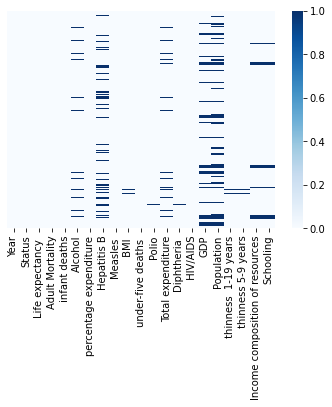

In [5]:
# Checking if there are null values
sns.heatmap(life_expectancy.isnull(), yticklabels=False, cmap="Blues")

In [6]:
# Check no.of null values for each column
life_expectancy.isnull().sum()

# To check no.of null values for columns having null values
# life_expectancy.isnull().sum()[np.where(life_expectancy.isnull().sum() != 0)[0]]

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
# Converting Values in Status column into '1' and '0'
#life_expectancy['Status'].replace({'Developing':0,
#                                   'Developed':1}, inplace=True)

# Perform one-hot encoding
life_expectancy = pd.get_dummies(life_expectancy, columns = ['Status'])

In [8]:
# Removing all null values by replacing with 0
#life_expectancy = life_expectancy.fillna(0)

# Since most of the are continous values we fill them with mean
life_expectancy = life_expectancy.apply(lambda x: x.fillna(x.mean()),axis=0)

In [9]:
# Checking null values in dataframe
life_expectancy.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

In [10]:
# In status column there are string values 'Developing' & 'Developed'
# print(f"{life_expectancy['Status'].nunique()} Unique values in Status column. They are:")
# life_expectancy['Status'].unique()

In [11]:
# Statistical Summary of dataframe
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,0.825732
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,1.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,0.000000,1.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


- From the dataframe we need to predict the Life expectancy, which acts as the dependent variable and remaining all acts as
  independent variables

- So, Let us see, how Life expectancy depends on Schooling, Year, Adult Mortality, infant deaths, Alcohol...etc

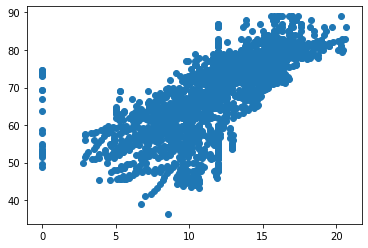

In [12]:
plt.scatter(life_expectancy['Schooling'], life_expectancy['Life expectancy '])
plt.show()

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

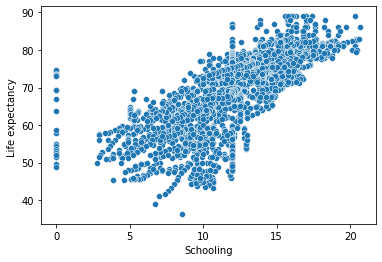

In [13]:
sns.scatterplot(data = life_expectancy, x = 'Schooling', y = 'Life expectancy ')
# As below visualization says that if schooling increases then Life expectancy also increases.

<AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>

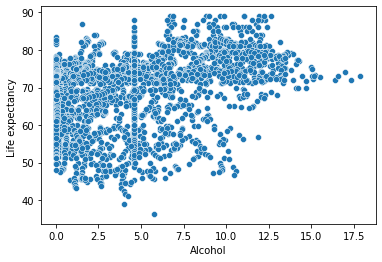

In [14]:
sns.scatterplot(data = life_expectancy, x = 'Alcohol', y = 'Life expectancy ')

<AxesSubplot:xlabel='infant deaths', ylabel='Life expectancy '>

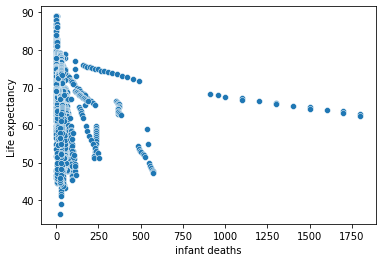

In [15]:
sns.scatterplot(data=life_expectancy, x='infant deaths', y='Life expectancy ')

<AxesSubplot:xlabel=' HIV/AIDS', ylabel='Life expectancy '>

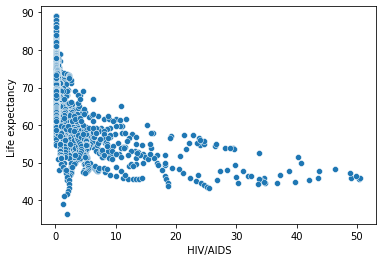

In [16]:
sns.scatterplot(data = life_expectancy, x = ' HIV/AIDS', y = 'Life expectancy ')
# Below visualization tells that HIV/AIDS is inversly proportional to Life expectancy

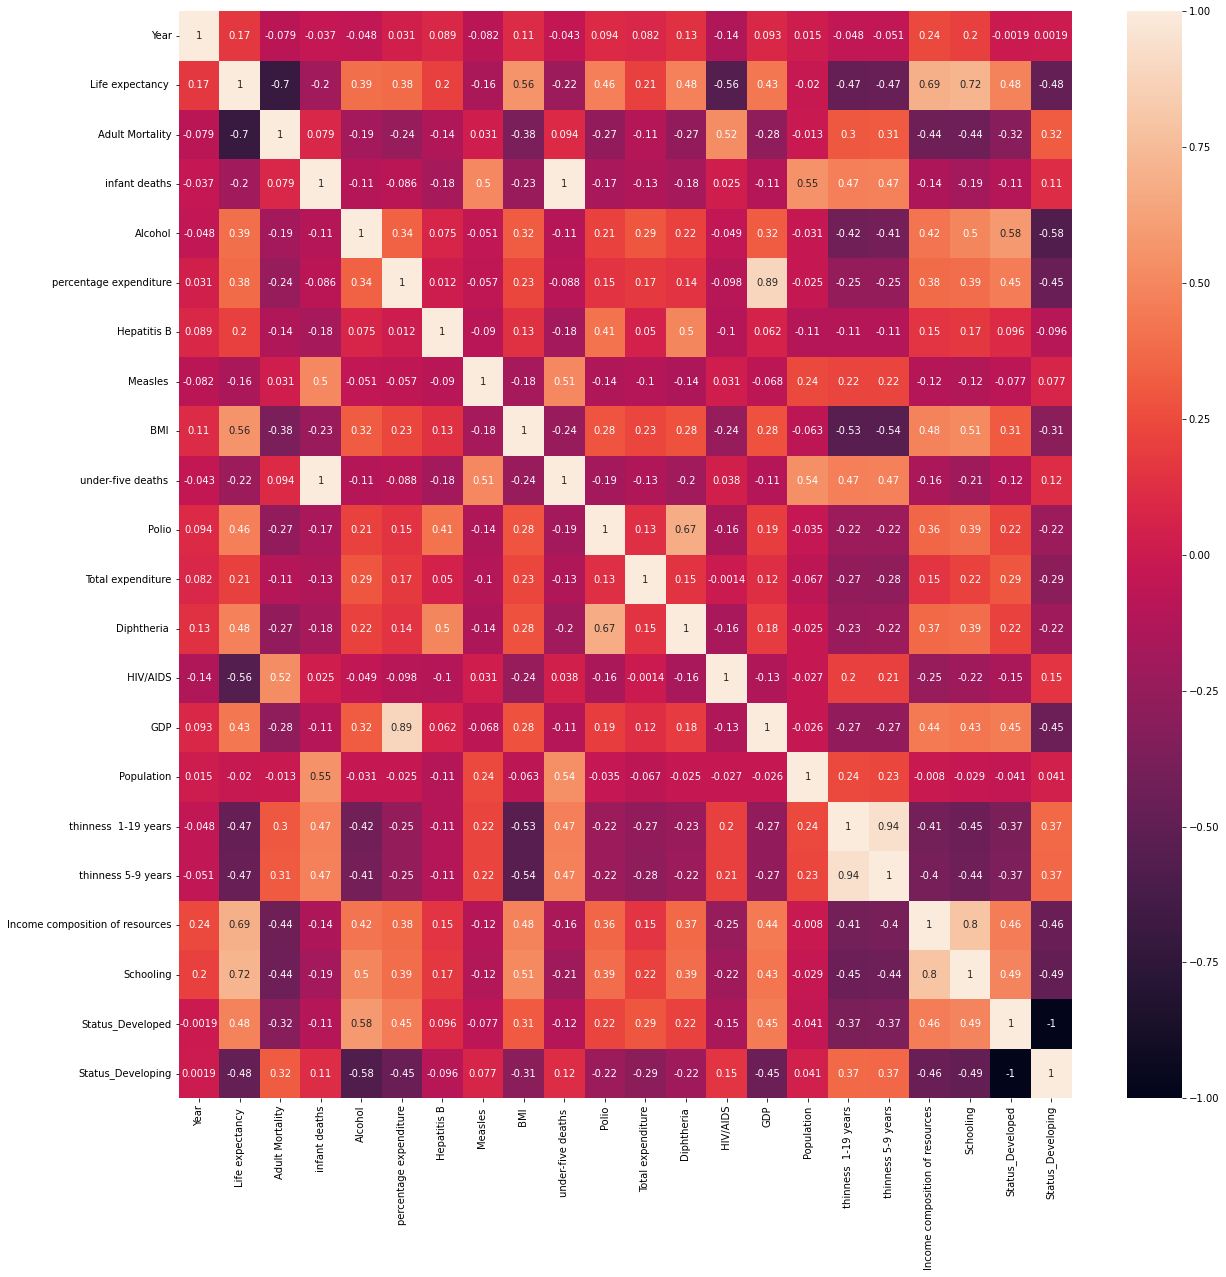

In [17]:
# Plot the correlation matrix

plt.figure(figsize = (20,20))
corr_matrix = life_expectancy.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# when two columns are compared, if value is lessthan '0' then those columns are inversly proportional to eachother, otherwise
# when value is greater than '0' those columns are directly proportional to eachother.

# split the data into test and train sets

In [38]:
# Create train and test data

X = life_expectancy.drop(columns = ['Life expectancy '])
y = life_expectancy[['Life expectancy ']]

# y = life_expectancy['Life expectancy '].values
# life_expectancy.drop(columns = ['Life expectancy '])
# y = y.reshape(-1, 1)
# y

In [39]:
# X = life_expectancy.values
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [40]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X

array([[ 1.6217623 ,  0.79158632,  0.26882378, ..., -0.57993072,
        -0.45939851,  0.45939851],
       [ 1.40498625,  0.85607167,  0.28578638, ..., -0.61056961,
        -0.45939851,  0.45939851],
       [ 1.1882102 ,  0.83188966,  0.30274898, ..., -0.6412085 ,
        -0.45939851,  0.45939851],
       ...,
       [-1.19632639, -0.73994077, -0.04498439, ..., -0.61056961,
        -0.45939851,  0.45939851],
       [-1.41310244,  4.20124926, -0.04498439, ..., -0.6718474 ,
        -0.45939851,  0.45939851],
       [-1.62987849,  4.03197521, -0.05346569, ..., -0.6718474 ,
        -0.45939851,  0.45939851]])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Scale the data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [43]:
len(X_train)

2350

In [44]:
len(y_train)

2350

In [45]:
len(X_test)

588

In [46]:
len(y_test)

588

# In the given dataset 'Life expectancy data' there is one dependant column i.e. 'Life expectancy' and remaining are independent columns
- So we are going to use Multiple Linear Regression
- This examines relationship between morethan two variables
- In simple linear regression model, which examines linear relationship between two variables only.

In [47]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import mean_squared_error, accuracy_score # For measuring accuracy

In [48]:
sklearn_Linear_regression = LinearRegression(fit_intercept = True) 
# By declaring fit_intercept=True, we are not forcing value of intercept(b) to be zero.
sklearn_Linear_regression.fit(X_train, y_train)

LinearRegression()

In [49]:
print('Linear Model Coefficient (m): ', sklearn_Linear_regression.coef_)
print('Linear Model Coefficient (b): ', sklearn_Linear_regression.intercept_)

Linear Model Coefficient (m):  [[-3.43033841e-03 -2.65612575e-01  1.14111511e+00  1.53241728e-02
   1.25320469e-02 -3.86888512e-02 -2.83257555e-02  9.05563826e-02
  -1.17581714e+00  6.89989299e-02  1.82213689e-02  1.04654523e-01
  -2.45469849e-01  4.46743460e-02  1.44911507e-02 -5.51210380e-02
   1.67722947e-02  1.10828852e-01  2.22001950e-01 -9.24177079e+12
  -9.24177079e+12]]
Linear Model Coefficient (b):  [7.80375485e-16]


In [50]:
accuracy = sklearn_Linear_regression.score(X_test, y_test)
accuracy

0.8120944762443096

In [51]:
# Making prediction

y_predict = sklearn_Linear_regression.predict(X_test)

Text(0, 0.5, 'True Values')

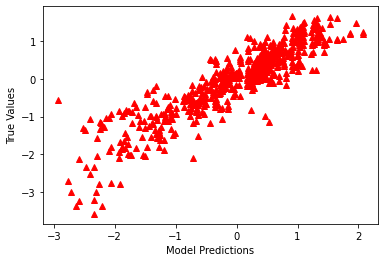

In [52]:
# Plot the scaled result

plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_predict, y_test) # r square
mse = mean_squared_error(y_predict, y_test) #Mean squared error
rmse = mse**0.5 #Root mean squared error
mae = mean_absolute_error(y_predict, y_test) #Mean absolute error

print("R2 Score: ",r2)
print("MSE: ",mse)
print("RMSE: ", rmse)
print("MAE: ",mae)

R2 Score:  0.7887688611703838
MSE:  0.18638629220375402
RMSE:  0.4317247875716126
MAE:  0.3151556746310759
